In [1]:
print(__doc__)

import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

Automatically created module for IPython interactive environment


In [2]:
noise_level=0.
def f(x):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))

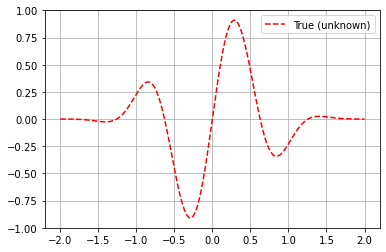

In [3]:
# Plot f(x) + contours

bounds = np.array([[-2.0, 2.0]])

x = np.linspace(bounds[:, 0], bounds[:, 1], 400).reshape(-1, 1)
#x = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)



fx = [f(x_i) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [4]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  bounds,      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=50,         # the number of evaluations of f
                  n_random_starts=20,  # the number of random initialization points
                  noise=0.0,       # the noise level (optional)
                  random_state=1234)   # the random seed


In [5]:
res

          fun: -0.9093518369951124
    func_vals: array([-4.67055893e-02,  5.58057360e-03,  6.27564034e-01, -1.30745917e-01,
        2.45778631e-02, -2.55421833e-02,  2.59554153e-02,  1.60509661e-03,
       -2.42309828e-02, -1.74803742e-02,  3.14323506e-04, -2.59576297e-01,
        1.35015893e-01, -2.31315614e-02, -1.11773516e-02, -1.88323196e-03,
       -8.63532198e-01,  1.76907649e-04,  3.41569914e-01,  2.11976553e-01,
       -9.09351837e-01, -3.64875101e-04, -8.87872368e-01, -3.23706526e-01,
        2.30435604e-03, -6.91425506e-01, -7.47361165e-02, -9.02881152e-01,
       -3.05869208e-01,  1.04325170e-02,  8.58803336e-01, -1.01800008e-04,
       -3.53979433e-01, -2.36691086e-02, -4.11487667e-01,  8.56666629e-04,
       -7.37773959e-02,  3.39552179e-01,  3.32330700e-01,  6.97423389e-01,
        7.54126476e-01, -2.20375561e-01, -5.87946813e-02,  9.07598306e-01,
       -2.64407213e-04, -8.80580506e-01, -9.09141273e-01, -9.09320387e-01,
       -9.09249060e-01, -9.06518500e-01])
       m

In [6]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)


'x^*=-0.2867, f(x^*)=-0.9094'

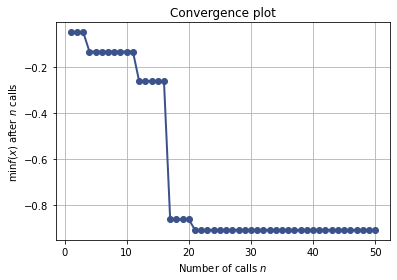

In [7]:
from skopt.plots import plot_convergence
plot_convergence(res);

/home/meysam/anaconda3/lib/python3.6/site-packages/skopt/learning/gaussian_process/gpr.py:338: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/home/meysam/anaconda3/lib/python3.6/site-packages/skopt/learning/gaussian_process/gpr.py:338: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/home/meysam/anaconda3/lib/python3.6/site-packages/skopt/learning/gaussian_process/gpr.py:338: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


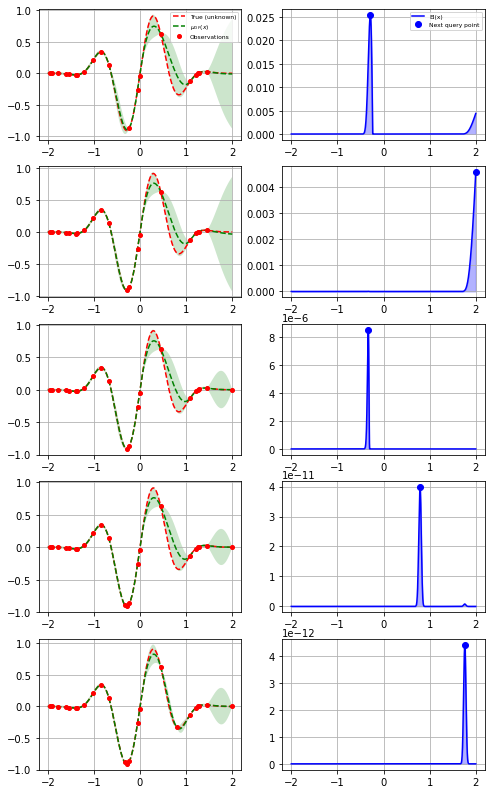

In [8]:
plt.rcParams["figure.figsize"] = (8, 14)
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()


/home/meysam/anaconda3/lib/python3.6/site-packages/skopt/learning/gaussian_process/gpr.py:338: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


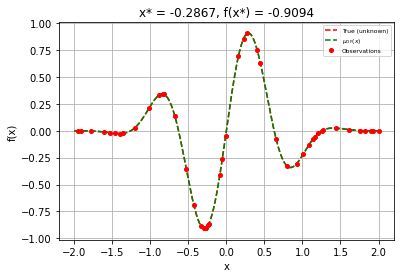

In [9]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
_ = plot_gaussian_process(res, objective=f,
                          noise_level=noise_level)

plt.show()

In [10]:

def plot_approximation(gpr, X, Y, X_sample, Y_sample, X_next=None, show_legend=False):
    mu, std = gpr.predict(X, return_std=True)
    plt.fill_between(X.ravel(), 
                     mu.ravel() + 1.96 * std, 
                     mu.ravel() - 1.96 * std, 
                     alpha=0.8) 
    plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
    plt.plot(X, mu, 'b--', lw=2, label='Surrogate function')
    plt.plot(X_sample, Y_sample, 'kx', mew=3, label='Noisy samples')
    if X_next:
        plt.axvline(x=X_next, ls='--', c='k', lw=1)
    if show_legend:
        plt.legend()

def plot_acquisition(X, Y, X_next, show_legend=False):
    plt.plot(X, Y, 'r-', lw=1, label='Acquisition function')
    plt.axvline(x=X_next, ls='--', c='k', lw=1, label='Next sampling location')
    if show_legend:
        plt.legend()    
        
def plot_convergence(X_sample, Y_sample, n_init=2):
    plt.figure(figsize=(12, 3))

    x = X_sample[n_init:].ravel()
    y = Y_sample[n_init:].ravel()
    r = range(1, len(x)+1)
    
    x_neighbor_dist = [np.abs(a-b) for a, b in zip(x, x[1:])]
    y_max_watermark = np.maximum.accumulate(y)
    
    plt.subplot(1, 2, 1)
    plt.plot(r[1:], x_neighbor_dist, 'bo-')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Distance between consecutive x\'s')

    plt.subplot(1, 2, 2)
    plt.plot(r, y_max_watermark, 'ro-')
    plt.xlabel('Iteration')
    plt.ylabel('Best Y')
    plt.title('Value of best selected sample')

In [11]:
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern


res = gp_minimize(lambda x: f(np.array(x)), 
                bounds.tolist(),
                  acq_func="EI",      # the acquisition function
                  xi=0.01,            # exploitation-exploration trade-off
                  n_calls=50,         # the number of evaluations of f
                  n_random_starts=20,  # the number of random initialization points
                  noise=0.0**2,       # the noise level (optional)
                  random_state=1234)   # the random seed


In [12]:
res

          fun: -0.9093518369951124
    func_vals: array([-4.67055893e-02,  5.58057360e-03,  6.27564034e-01, -1.30745917e-01,
        2.45778631e-02, -2.55421833e-02,  2.59554153e-02,  1.60509661e-03,
       -2.42309828e-02, -1.74803742e-02,  3.14323506e-04, -2.59576297e-01,
        1.35015893e-01, -2.31315614e-02, -1.11773516e-02, -1.88323196e-03,
       -8.63532198e-01,  1.76907649e-04,  3.41569914e-01,  2.11976553e-01,
       -9.09351837e-01, -3.64875101e-04, -8.87872368e-01, -3.23706526e-01,
        2.30435604e-03, -6.91425506e-01, -7.47361165e-02, -9.02881152e-01,
       -3.05869208e-01,  1.04325170e-02,  8.58803336e-01, -1.01800008e-04,
       -3.53979433e-01, -2.36691086e-02, -4.11487667e-01,  8.56666629e-04,
       -7.37773959e-02,  3.39552179e-01,  3.32330700e-01,  6.97423389e-01,
        7.54126476e-01, -2.20375561e-01, -5.87946813e-02,  9.07598306e-01,
       -2.64407213e-04, -8.80580506e-01, -9.09141273e-01, -9.09320387e-01,
       -9.09249060e-01, -9.06518500e-01])
       m

In [13]:
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)
#X = np.linspace(-2, 2, 400).reshape(-1, 1)


def f(X, noise_level=noise_level):
    return np.sin(5 * X) * (1 - np.tanh(X ** 2))

# Noise-free objective function values at X 
Y = f(X)
X.shape, Y.shape

((400, 1), (400, 1))

In [14]:
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern


res = gp_minimize(lambda x: f(np.array(x))[0], 
                bounds.tolist(),
                  acq_func="EI",      # the acquisition function
                  xi=0.01,            # exploitation-exploration trade-off
                  n_calls=50,         # the number of evaluations of f
                  n_random_starts=20,  # the number of random initialization points
                  noise=0.0**2,       # the noise level (optional)
                  random_state=1234)   # the random seed


/home/meysam/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/meysam/anaconda3/lib/python3.6/site-packages/skopt/learning/gaussian_process/gpr.py:338: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


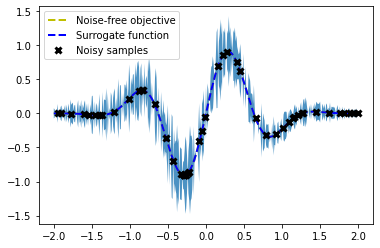

In [15]:
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise_level**2)

# Fit GP model to samples for plotting results
gpr.fit(res.x_iters, res.func_vals)

# Plot the fitted model and the noisy samples
plot_approximation(gpr, X, Y, res.x_iters, res.func_vals, show_legend=True)


In [16]:
import GPy
import GPyOpt

from GPyOpt.methods import BayesianOptimization

kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
bds = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]

optimizer = BayesianOptimization(f=f, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.01,
                                 noise_var = 0,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=True)

optimizer.run_optimization(max_iter=10)

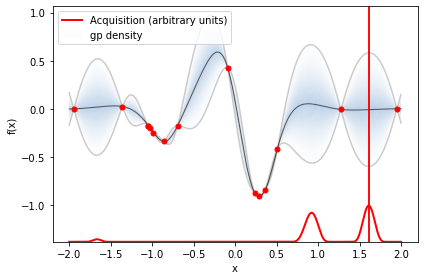

In [17]:
plt.rcParams["figure.figsize"] = (6, 4)

optimizer.plot_acquisition()

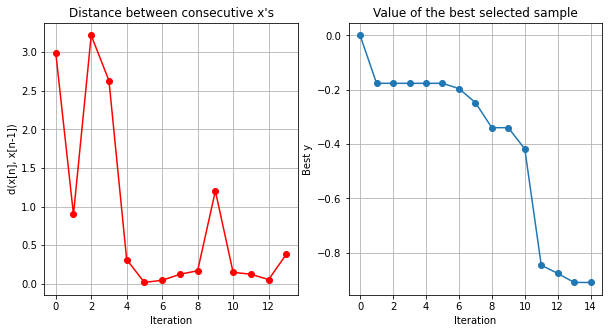

In [18]:
optimizer.plot_convergence()


In [ ]:
# https://github.com/fmfn/BayesianOptimization

In [ ]:
from matplotlib import gridspec
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 2))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 2))
    acq.set_ylim((-1, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

In [19]:
def black_box_function(x):

    return -1*(np.sin(5 * x) * (1 - np.tanh(x ** 2)))

In [20]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (-2, 2)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [21]:
optimizer.maximize(
    init_points=10,
    n_iter=10,
)


|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.8868    | -0.3319   |
| 2         | 0.333     | 0.8813    |
| 3         | -0.000364 | -2.0      |
| 4         | -0.3231   | -0.7907   |
| 5         | 0.02552   | -1.413    |
| 6         | 0.009324  | -1.631    |
| 7         | -0.000689 | -1.255    |
| 8         | 0.03356   | -0.6178   |
| 9         | 0.7318    | -0.4129   |
| 10        | -0.6838   | 0.1553    |
| 11        | -0.01646  | 1.31      |
| 12        | 0.0003649 | 2.0       |
| 13        | 0.8258    | -0.2083   |
| 14        | 0.333     | 0.8813    |
| 15        | 0.9062    | -0.2732   |
| 16        | 0.9089    | -0.2954   |
| 17        | 0.9094    | -0.2887   |
| 18        | 0.9094    | -0.289    |
| 19        | 0.9094    | -0.2892   |
| 20        | 0.9094    | -0.2892   |


In [22]:
print(optimizer.max)


{'target': 0.9094297946146589, 'params': {'x': -0.28924573069453235}}


In [23]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': 0.8867730209588112, 'params': {'x': -0.331911981189704}}
Iteration 1: 
	{'target': 0.33298845362326, 'params': {'x': 0.8812979737686324}}
Iteration 2: 
	{'target': -0.00036491938593243413, 'params': {'x': -1.9995425007306205}}
Iteration 3: 
	{'target': -0.3230567907845687, 'params': {'x': -0.7906697094726409}}
Iteration 4: 
	{'target': 0.02551669259558465, 'params': {'x': -1.4129764367315478}}
Iteration 5: 
	{'target': 0.009323543720517585, 'params': {'x': -1.6306456209248088}}
Iteration 6: 
	{'target': -0.0006895678336868447, 'params': {'x': -1.2549591544893164}}
Iteration 7: 
	{'target': 0.033563601583546446, 'params': {'x': -0.617757091827809}}
Iteration 8: 
	{'target': 0.7318134467478039, 'params': {'x': -0.41293010307732025}}
Iteration 9: 
	{'target': -0.6837806444517969, 'params': {'x': 0.15526693601342778}}
Iteration 10: 
	{'target': -0.016463384013683423, 'params': {'x': 1.3097989286671141}}
Iteration 11: 
	{'target': 0.00036487510102654235, 'params': 

In [25]:
x_ = np.linspace(-2, 2, 1000).reshape(-1, 1)
y_= black_box_function(x_)
x_.shape, y_.shape

((1000, 1), (1000, 1))

|   iter    |  target   |     x     |
-------------------------------------
| 21        | 0.895     | -0.3232   |
| 22        | 0.2669    | 0.7409    |
| 23        | -0.04189  | -1.182    |
| 24        | -0.01954  | 1.512     |
| 25        | -4.318e-0 | -1.89     |
| 26        | 0.1497    | 0.6819    |
| 27        | 0.8879    | -0.3308   |
| 28        | -0.8715   | 0.2348    |
| 29        | 0.02477   | -1.438    |
| 30        | -0.02493  | -1.208    |
| 31        | 0.9094    | -0.2895   |
| 32        | 0.9094    | -0.2895   |
| 33        | 0.9094    | -0.2896   |
| 34        | 0.9094    | -0.2894   |
| 35        | 0.9094    | -0.2894   |
| 36        | 0.9094    | -0.2894   |
| 37        | 0.9094    | -0.2894   |
| 38        | 0.9094    | -0.2893   |
| 39        | 0.9094    | -0.2893   |
| 40        | 0.9094    | -0.2893   |


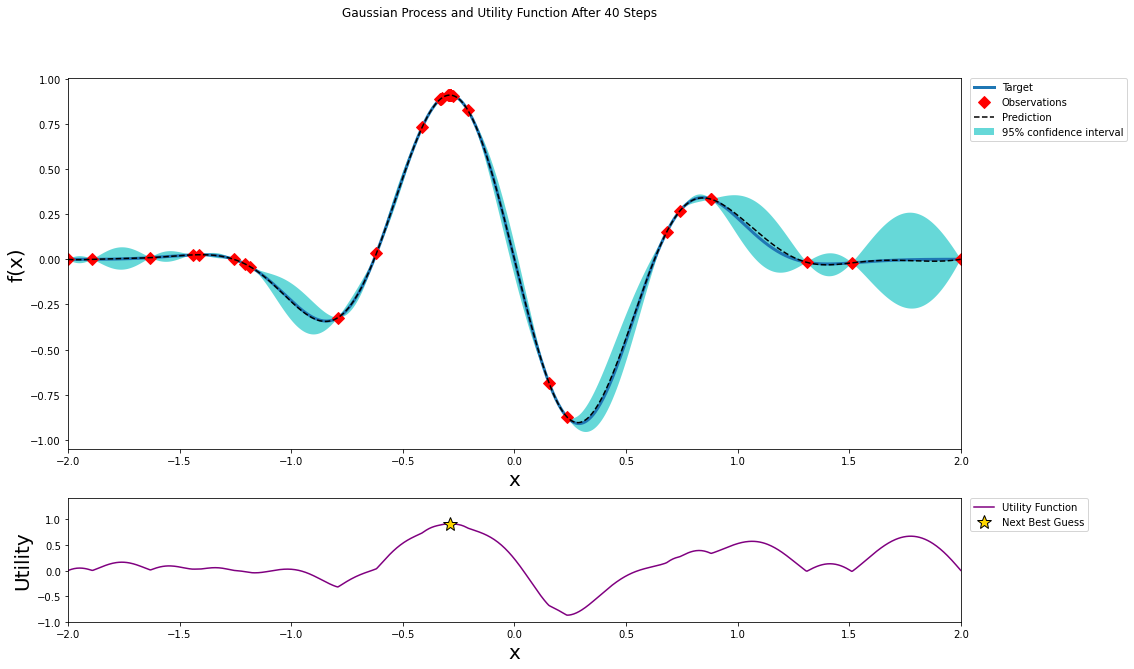

In [26]:
optimizer.maximize(init_points=10, n_iter=10, kappa=5)
plot_gp(optimizer, x_, y_)